#### This code utilizes only one dataset on movie ratings

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB

In [2]:
columns = ['userId','movieId','rating']
ratings = pd.read_csv('ratings.csv', usecols = columns)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### 2. Exploring dataset

In [3]:
print('Total number of USERS in the data : ',len(ratings['userId'].unique()))
print('Total number of unique MOVIES in the data : ',len(ratings['movieId'].unique()))

Total number of USERS in the data :  610
Total number of unique MOVIES in the data :  9724


### Using pivot method to get data on ratings for each movie by each user

In [4]:
df = ratings.pivot(index='userId',columns='movieId',values='rating')
df = df.reset_index().rename_axis(None, axis=1)
df.set_index('userId', inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring the ratings for null values and ratings distribution

In [5]:
ranks = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
counts ={}
for column in df.columns:
    freq = df[column].value_counts()
    for i in freq.axes[0]:
        if i not in counts.keys():
            counts[i]=freq[i]
        else:
            counts[i]=counts[i]+freq[i]          
dict1 = OrderedDict(sorted(counts.items()))

Text(0.5, 0, 'Ratings (Number of stars)')

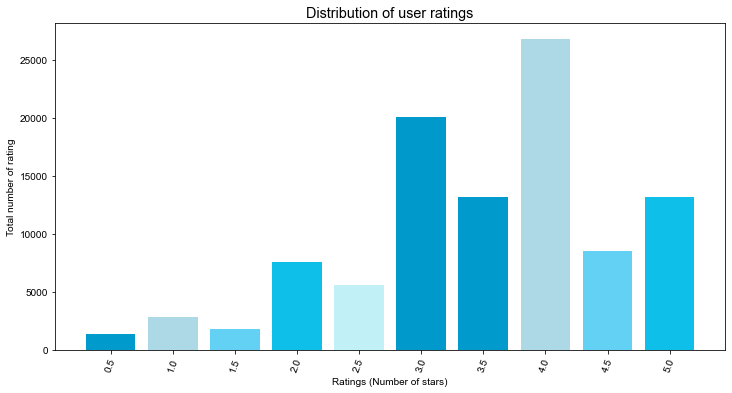

In [6]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
#color_palette_list = ['#C0392B','#E74C3C', '#2980B9', '#3498DB', '#1ABC9C', '#16A085']
#color_palette_list = ['#5DADE2','#3498DB','#2874A6']
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
ind = np.arange(len(dict1.keys()))
bars1 = ax.bar(ind, dict1.values(), 
        color = color_palette_list, 
        label='Number of users')
ax.set_title("Distribution of user ratings")
ax.set_ylabel("Total number of rating")
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(dict1.keys(), rotation=70)
ax.set_xlabel("Ratings (Number of stars)")

In [7]:
# total null values
df.isna().sum().sum() 

5830804

### Extracting top 10 movies for which majority of users have voted
#### We will use the movie ID with highest votings as a target movie for our recommender model

In [8]:
s = df.notna().sum().nlargest(10)

<AxesSubplot:>

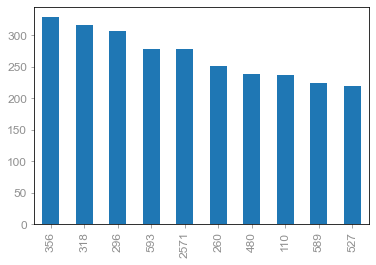

In [9]:
s.plot(kind='bar')

In [10]:
#dropping rows with null values for the tomp movie ID
df.dropna(subset=[356],inplace=True)
df = df.replace(np.nan,0)
df.shape

(329, 9724)

### 3. Defining feature matrix, X and target vector, Y

In [11]:
#movie ID with highest votings will be used for recommendation prediction
Y = df[356]

In [12]:
Y.value_counts().sort_index()

0.5      1
1.0      1
2.0      9
2.5      3
3.0     39
3.5     27
4.0     94
4.5     39
5.0    116
Name: 356, dtype: int64

### The output needs to be yes, if the movie is recommended and no, if it's not recommended. 
#### We can consider movies with ratings greater than 3 as being liked (being recommended). Lets label the target movie ratings into two classes of recommended (for rating more than 3) and not recommended (for rating less than or equal to 3)

In [13]:
Y=Y.where(Y>3,0)
Y=Y.mask(Y>3,1)

In [14]:
Y.value_counts()

1.0    276
0.0     53
Name: 356, dtype: int64

Text(0.5, 1.0, 'Target movie recommendation')

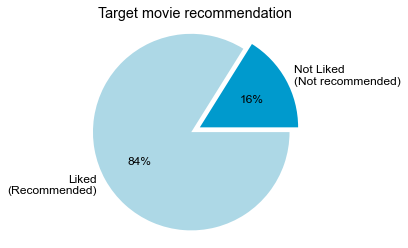

In [55]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#000000'
#plt.rcParams['axes.labelcolor']= '#000000'
#plt.rcParams['xtick.color'] = '#909090'
#plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
#labels = Y.value_counts(ascending=True).index
labels = ['Not Liked\n(Not recommended)','Liked\n(Recommended)']
percentages = Y.value_counts().sort_index().values
explode=(0.1,0)
ax.pie(percentages, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       explode=explode, shadow=False, startangle=0)
ax.axis('equal')
ax.set_title("Target movie recommendation")
#ax.legend(frameon=False, bbox_to_anchor=(1.3,0.5))

In [16]:
# Defining feature matrix with list of movies and their ratings
X = df.copy()
del X[356]  #deleting the target feature for which we want to predict recommendation
X.shape

(329, 9723)

### 4. Developing model based on naive bayes algorithm using MultinomialNB module of Scikit learn
**We are using MultinomialNB instead of BernoulliNB as our input values range from 0 to 5.**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(len(Y_train), len(Y_test))

263 66


In [19]:
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, Y_train)
prediction_prob = clf.predict_proba(X_test)
prediction_prob[:10]

array([[2.51868335e-058, 1.00000000e+000],
       [9.41466882e-045, 1.00000000e+000],
       [2.53204669e-102, 1.00000000e+000],
       [6.89190503e-013, 1.00000000e+000],
       [5.31573361e-014, 1.00000000e+000],
       [7.35832927e-001, 2.64167073e-001],
       [2.60342830e-023, 1.00000000e+000],
       [4.47896831e-114, 1.00000000e+000],
       [3.25736320e-036, 1.00000000e+000],
       [1.55745365e-059, 1.00000000e+000]])

In [20]:
prediction = clf.predict(X_test)
print(prediction[:10])

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [21]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 78.8%


### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction, labels=[0, 1]))

[[ 2  9]
 [ 5 50]]


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Precision measures the fraction of positive calls that are correct [TP/(TP+FP)]
precision_score(Y_test, prediction, pos_label=1)

0.847457627118644

In [24]:
#Recall, measures the fraction of true positives that are correctly identified - TRUE POSITIVE RATE [TP/(TP+FN)]
recall_score(Y_test, prediction, pos_label=1)

0.9090909090909091

In [25]:
#The f1 score comprehensively includes both the precision and the recall, and equates to their harmonic mean: 
#2*(precision*recall)/(precision+recall)
f1_score(Y_test, prediction, pos_label=1) 

0.8771929824561402

In [26]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.29      0.18      0.22        11
         1.0       0.85      0.91      0.88        55

    accuracy                           0.79        66
   macro avg       0.57      0.55      0.55        66
weighted avg       0.75      0.79      0.77        66



**The ROC curve is a plot of the true positive rate versus the false positive rate at various probability thresholds, ranging from 0 to 1**

In [27]:
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.1, 0.05)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            # if truth and prediction are both 1
            if y == 1:
                true_pos[i] += 1
                # if truth is 0 while prediction is 1
            else:
                false_pos[i] += 1
        else:
            break

In [28]:
n_pos_test = (Y_test == 1).sum()
n_neg_test = (Y_test == 0).sum()
true_pos_rate = [tp / n_pos_test for tp in true_pos]
false_pos_rate = [fp / n_neg_test for fp in false_pos]


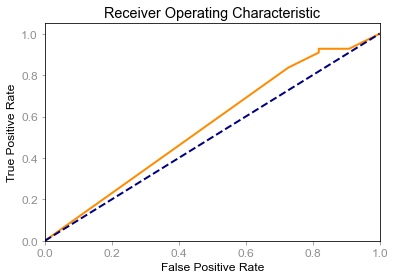

In [29]:
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, 
          color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.5586776859504131

### Applying K-fold crossvalidation

In [31]:
from sklearn.model_selection import StratifiedKFold
k = 5
k_fold = StratifiedKFold(n_splits=k)

In [32]:
smoothing_factor_option = [1, 2, 3, 4, 5, 6]
fit_prior_option = [True, False]
auc_record = {}

In [33]:
#Dropping user ids as index
X.reset_index(drop=True,inplace=True)
Y.reset_index(drop=True,inplace=True)

In [34]:
for train_indices, test_indices in k_fold.split(X, Y):
    X_train, X_test = X.iloc[train_indices,:], X.iloc[test_indices,:]
    Y_train, Y_test = Y.iloc[train_indices], Y.iloc[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha, 
                                fit_prior=fit_prior)
            clf.fit(X_train, Y_train)
            prediction_prob = clf.predict_proba(X_test)
            pos_prob = prediction_prob[:, 1]
            auc = roc_auc_score(Y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc+auc_record[alpha].get(fit_prior, 0.0)

In [35]:
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():
        print(f'    {smoothing}        {fit_prior}    {auc/k:.5f}')

    1        True    0.59585
    1        False    0.59294
    2        True    0.57171
    2        False    0.57171
    3        True    0.56646
    3        False    0.56514
    4        True    0.57278
    4        False    0.57114
    5        True    0.55096
    5        False    0.55840
    6        True    0.52672
    6        False    0.53654


In [36]:
clf = MultinomialNB(alpha=1.0, fit_prior=False)
clf.fit(X_train, Y_train)
pos_prob = clf.predict_proba(X_test)[:, 1]
print('AUC with the best model:', roc_auc_score(Y_test, pos_prob))

AUC with the best model: 0.48363636363636364
